In [1]:
cd ..

/home/savannahgramze/research/lactea-filament/lactea-filament


In [2]:
from catalog_query import get_VVV_catalog
import cutout_manager

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

import regions
from regions import Regions

from catalog_plots import JWSTCatalog
from isochrone_plots import Isochrone

In [3]:
pos_ctr = SkyCoord('17:46:20.9063719501', '-28:37:51.6942550990', unit=(u.hourangle, u.deg))

In [4]:
position_HMSFR = SkyCoord('17:46:21.4669695284', '-28:35:38.1118497742', unit=(u.hourangle, u.deg))

# JWST

In [5]:
basepath = '~/research/Research/JWST/cloudc/'#'/orange/adamginsburg/jwst/cloudc/'

In [6]:
#basetable = Table.read(f'{basepath}/catalogs/basic_merged_photometry_tables_merged_bgsub_blur.fits')
basetable = Table.read(f'{basepath}/basic_merged_indivexp_photometry_tables_merged.fits')
#fits.open(f'{basepath}/basic_merged_indivexp_photometry_tables_merged.fits')

In [88]:
mas_405 = np.logical_or(np.array(basetable['qfit_f405n'])<0.4, np.isnan(np.array(basetable['mag_ab_f405n'])))
mas_410 = np.logical_or(np.array(basetable['qfit_f410m'])<0.4, np.isnan(np.array(basetable['mag_ab_f410m'])))
mask = np.logical_and(mas_405, mas_410)
mas_466 = np.logical_or(np.array(basetable['qfit_f466n'])<0.4, np.isnan(np.array(basetable['mag_ab_f466n'])))
mask = np.logical_and(mask, mas_466)
mas_187 = np.logical_or(np.array(basetable['qfit_f187n'])<0.4, np.isnan(np.array(basetable['mag_ab_f187n'])))
mask = np.logical_and(mask, mas_187)
mas_182 = np.logical_or(np.array(basetable['qfit_f182m'])<0.4, np.isnan(np.array(basetable['mag_ab_f182m'])))
mask = np.logical_and(mask, mas_182)
mas_212 = np.logical_or(np.array(basetable['qfit_f212n'])<0.4, np.isnan(np.array(basetable['mag_ab_f212n'])))
mask = np.logical_and(mask, mas_212)

mask_num = np.array([basetable[colname] < 0.1 for colname in basetable.colnames if colname.startswith('emag')]).max(axis=0)

mask = np.logical_and(mask, mask_num)

In [89]:
tbl_use = basetable[mask]
crds_use = tbl_use['skycoord_ref']

In [90]:
fn_405 = f'{basepath}/images/F410_reproj_merged-fortricolor.fits'
#'/orange/adamginsburg/jwst/cloudc/images/F410_reproj_merged-fortricolor.fits'
#'/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
ww = WCS(fits.open(fn_405)[0].header)

In [91]:
ls ~/research/Research/JWST/cloudc//regions_/*

/home/savannahgramze/research/Research/JWST/cloudc//regions_/filament_short.region*


In [92]:
filament_reg = Regions.read('/home/savannahgramze/research/Research/JWST/cloudc//regions_/filament_short.region')
#regions.Regions.read(f'{basepath}/regions_/filament_short.reg')
tbl_in = tbl_use[filament_reg[0].contains(crds_use, wcs=ww)]
crds_in = crds_use[filament_reg[0].contains(crds_use, wcs=ww)]

In [95]:
color_182_212 = tbl_use['mag_ab_f182m'] - tbl_use['mag_ab_f212n']
color_405_410 = tbl_use['mag_ab_f405n'] - tbl_use['mag_ab_f410m']
color_187_182 = tbl_use['mag_ab_f187n'] - tbl_use['mag_ab_f182m']
mag_187 = tbl_use['mag_ab_f187n']
mag_182 = tbl_use['mag_ab_f182m']
mag_212 = tbl_use['mag_ab_f212n']
mag_410 = tbl_use['mag_ab_f410m']
mag_405 = tbl_use['mag_ab_f405n']
mag_466 = tbl_use['mag_ab_f466n']

color_in_182_212 = tbl_in['mag_ab_f182m'] - tbl_in['mag_ab_f212n']
color_in_405_410 = tbl_in['mag_ab_f405n'] - tbl_in['mag_ab_f410m']
color_in_187_182 = tbl_in['mag_ab_f187n'] - tbl_in['mag_ab_f182m']
mag_in_187 = tbl_in['mag_ab_f187n']
mag_in_182 = tbl_in['mag_ab_f182m']
mag_in_410 = tbl_in['mag_ab_f410m']
mag_in_405 = tbl_in['mag_ab_f405n']

Text(0.5, 1.0, 'With qfit < 0.4')

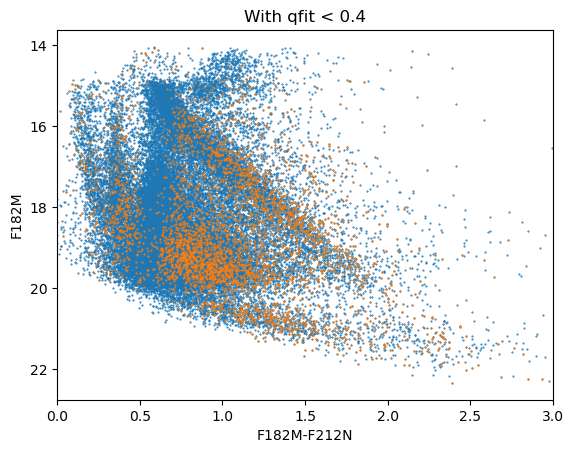

In [94]:
ax = plt.subplot(111)
ax.scatter(color_182_212, mag_182, s=1, marker='.')
ax.scatter(color_in_182_212, mag_in_182, s=1, marker='.')
plt.gca().invert_yaxis()
ax.set_xlabel('F182M-F212N')
ax.set_ylabel('F182M')
plt.xlim(left=0, right=3)
plt.title('With qfit < 0.4')

Text(0, 0.5, 'F410M')

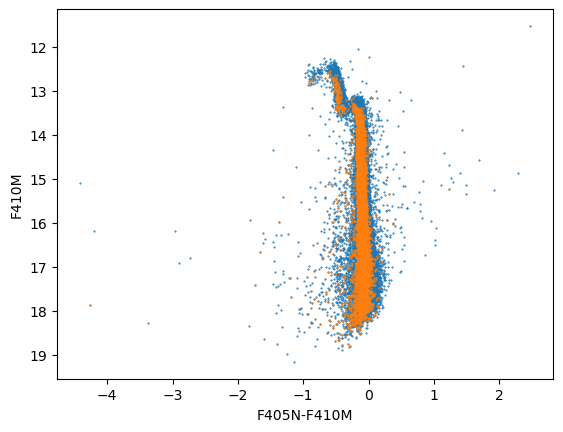

In [75]:
ax = plt.subplot(111)
ax.scatter(color_405_410, mag_410, s=1, marker='.')
ax.scatter(color_in_405_410, mag_in_410, s=1, marker='.')
plt.gca().invert_yaxis()
ax.set_xlabel('F405N-F410M')
ax.set_ylabel('F410M')
#plt.xlim(left=-5, right=1)

Text(0, 0.5, 'F410M')

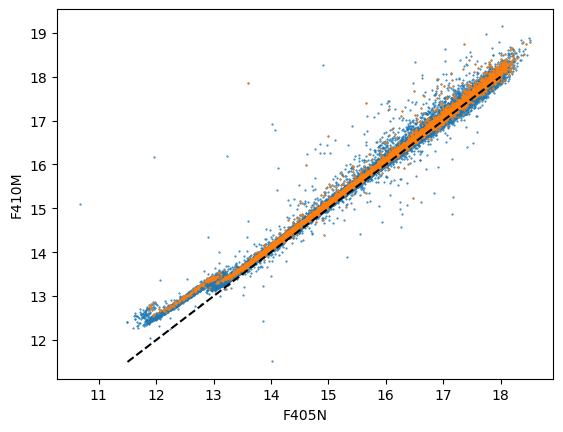

In [76]:
ax = plt.subplot(111)
ax.scatter(mag_405, mag_410, s=1, marker='.')
ax.scatter(mag_in_405, mag_in_410, s=1, marker='.')
ax.plot([11.5, 18], [11.5, 18], 'k--')
#plt.gca().invert_yaxis()
ax.set_xlabel('F405N')
ax.set_ylabel('F410M')
#plt.xlim(left=-5, right=1)


Text(0, 0.5, 'F182M')

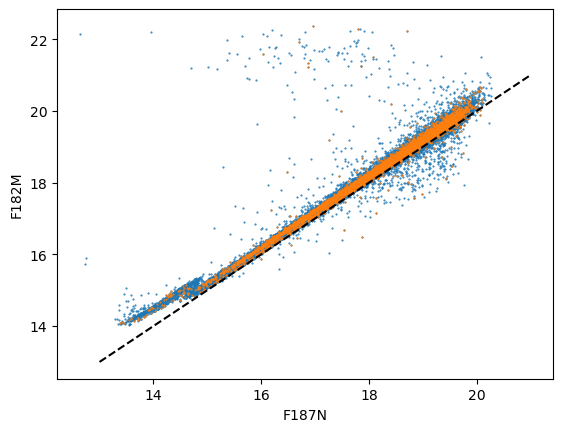

In [77]:
ax = plt.subplot(111)
ax.scatter(mag_187, mag_182, s=1, marker='.')
ax.scatter(mag_in_187, mag_in_182, s=1, marker='.')
ax.plot([13, 21], [13, 21], 'k--')
#plt.gca().invert_yaxis()
ax.set_xlabel('F187N')
ax.set_ylabel('F182M')
#plt.xlim(left=-5, right=1)


(-2.0, 0.0)

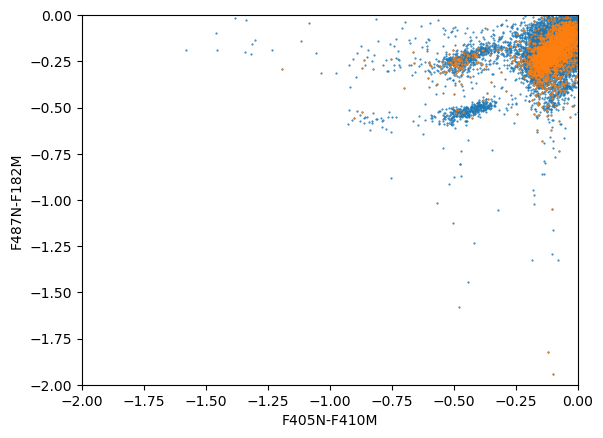

In [78]:
ax = plt.subplot(111)
ax.scatter(color_405_410, color_187_182, s=1, marker='.')
ax.scatter(color_in_405_410, color_in_187_182, s=1, marker='.')
#ax.plot([13, 21], [13, 21], 'k--')
#plt.gca().invert_yaxis()
ax.set_xlabel('F405N-F410M')
ax.set_ylabel('F487N-F182M')
plt.xlim(left=-2, right=0)
plt.ylim(bottom=-2, top=0)